## Create a picture with hill climbing using a mosaic grid

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import helper
from individual import Individual

In [87]:
img = cv2.imread("./bird.jpg")
cap = cv2.imread("./pic.png")
ali = cv2.imread("./aleks.png")
us = cv2.imread("./kjoet.png")

Image size:(426, 640, 3)


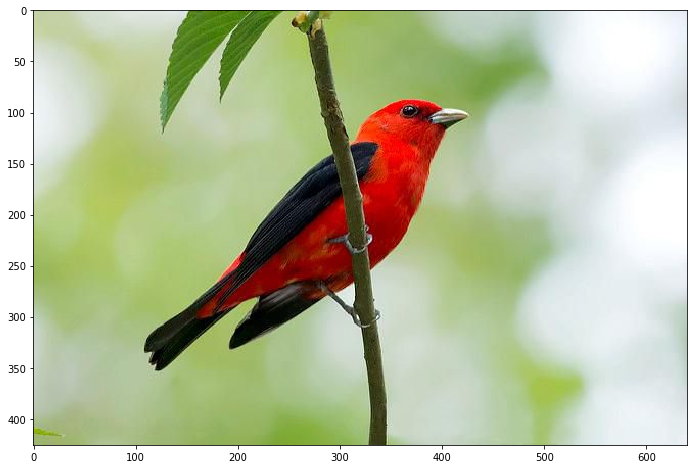

In [4]:
helper.show_img(img)

In [5]:
def get_masks(shape):
    mid_coord = (shape[1]//2, shape[0]//2)
    tl = (0, 0)
    tr = (shape[1], 0)
    bl = (0, shape[0])
    br = (shape[1], shape[0])
    
    top = np.array((tl, mid_coord, tr))
    top = top.reshape((-1, 1, 2))
    
    right = np.array((tr, mid_coord, br))
    right = right.reshape((-1, 1, 2))
    
    bottom = np.array((bl, mid_coord, br))
    bottom = bottom.reshape((-1, 1, 2))
    
    left = np.array((tl, mid_coord, bl))
    left = left.reshape((-1, 1, 2))
    
    top_m = np.zeros(shape)
    cv2.fillPoly(top_m, [top], (1, 0, 0))
    top_m = np.sum(top_m, axis=2).astype(bool)

    right_m = np.zeros(shape)
    cv2.fillPoly(right_m, [right], (1, 0, 0))
    right_m = np.sum(right_m, axis=2).astype(bool)

    bottom_m = np.zeros(shape)
    cv2.fillPoly(bottom_m, [bottom], (1, 0, 0))
    bottom_m = np.sum(bottom_m, axis=2).astype(bool)
    
    left_m = np.zeros(shape)
    cv2.fillPoly(left_m, [left], (1, 0, 0))
    left_m = np.sum(left_m, axis=2).astype(bool)
    
    return top_m, right_m, bottom_m, left_m

In [6]:
def build_square(img):
    masks = get_masks(img.shape)
    for mask in masks:
        color = np.average(img[mask], axis=0)
        img[mask, :] = color.astype(np.uint)
    return img

def build_mosaic(img, grid_size):
    canvas = np.zeros_like(img)
    
    # grid size is (rows, columns)
    r_size = img.shape[0] // grid_size[0]
    c_size = img.shape[1] // grid_size[1]
    
    for r_n in range(grid_size[0]):
        for c_n in range(grid_size[1]):
            # starting coordinates for row/column
            r_s = r_n * r_size
            c_s = c_n * c_size            
            
            # end coordinates for row/column
            if r_n < grid_size[0] - 1:
                r_e = r_s + r_size
            else:
                r_e = img.shape[0]
            if c_n < grid_size[1] - 1:
                c_e = c_s + c_size
            else:
                c_e = img.shape[1]                
            
            canvas[r_s:r_e, c_s:c_e] = build_square(img[r_s:r_e, c_s:c_e])
    
    return canvas

Image size:(426, 640, 3)


True

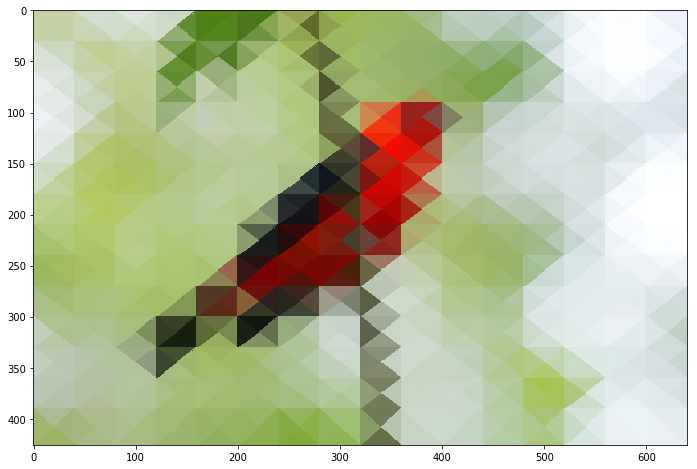

In [7]:
res = build_mosaic(img, (14, 16))
helper.show_img(res)
cv2.imwrite("./mosaic.png", res)

Image size:(426, 640, 3)


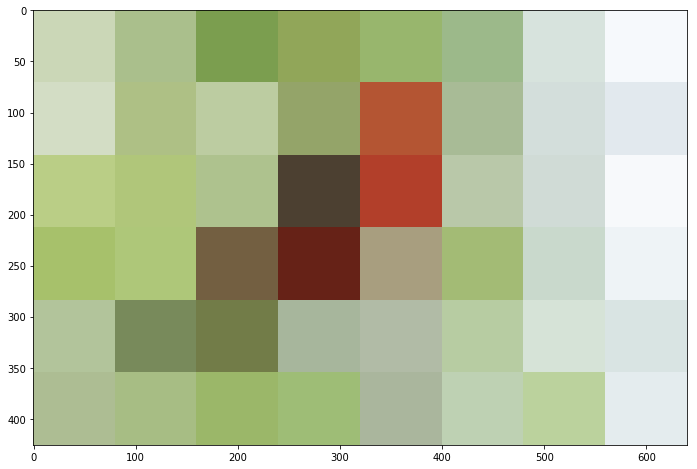

In [112]:
grid_rows = 6
grid_cols = 8
ind = Individual(img, (grid_rows,grid_cols))
ind.draw()
helper.show_img(ind.canvas)

In [111]:
im_name = "bird"
cv2.imwrite("./climb/{}_r{}_c{}_i{}.png".format(im_name, grid_rows, grid_cols, 0), ind.canvas)
for i in range(50):
    print("Iteration: {}".format(i+1))
    ind.mutate()
    cv2.imwrite("./climb/{}_r{}_c{}_i{}.png".format(im_name, grid_rows, grid_cols, i+1), ind.canvas)

Iteration: 1
OLD: 16654132493.0, NEW: 16654076922.0
OLD: 16654406469.0, NEW: 16654091042.0
OLD: 16654091042.0, NEW: 16653869869.0
OLD: 16653950519.0, NEW: 16653555499.0
OLD: 16653555499.0, NEW: 16653086009.0
OLD: 16654914574.0, NEW: 16653355317.0
OLD: 16654529347.0, NEW: 16651639965.0
OLD: 16651639965.0, NEW: 16651617419.0
OLD: 16651617419.0, NEW: 16651584018.0
OLD: 16651584018.0, NEW: 16651202831.0
OLD: 16651830089.0, NEW: 16651260246.0
OLD: 16662057250.0, NEW: 16648071764.0
OLD: 16650867283.0, NEW: 16647036947.0
OLD: 16647238806.0, NEW: 16646751662.0
OLD: 16646769491.0, NEW: 16646444268.0
OLD: 16646444268.0, NEW: 16645480927.0
OLD: 16645480927.0, NEW: 16645230630.0
OLD: 16645230630.0, NEW: 16628786508.0
OLD: 16628786508.0, NEW: 16624977509.0
OLD: 16635261219.0, NEW: 16624977509.0
OLD: 16624977509.0, NEW: 16624804730.0
OLD: 16634508482.0, NEW: 16624477526.0
OLD: 16624477526.0, NEW: 16624104521.0
OLD: 16624104521.0, NEW: 16622077177.0
OLD: 16622077177.0, NEW: 16621881504.0
OLD: 1662299

KeyboardInterrupt: 

Image size:(426, 640, 3)


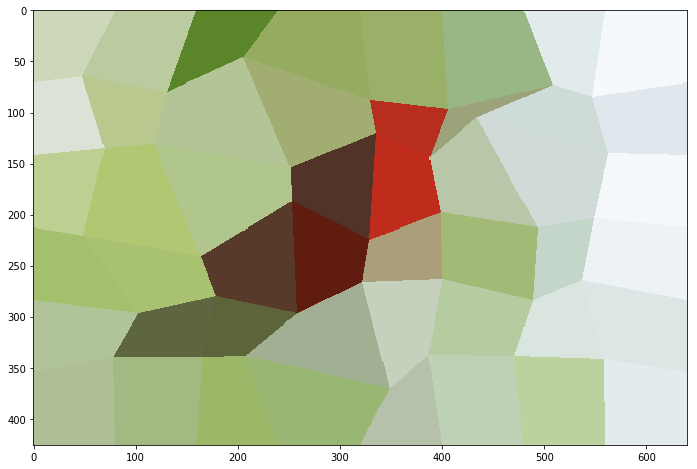

In [109]:
helper.show_img(ind.canvas)

In [106]:
np.random.randint(-10, 10)

-10